# **Classification**

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

## Load Datasets

In [ ]:
# script lettura dataset
df = pd.read_csv('TrainingTSgrande.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [ ]:
df_test1 = pd.read_csv('ValidateTSgrande.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [ ]:
df_test2 = pd.read_csv('TestTSgrande.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df_test1['DateTime'] = pd.to_datetime(df_test1['DateTime'])
df_test2['DateTime'] = pd.to_datetime(df_test2['DateTime'])

## Data Preparation

In [ ]:
df['Weekday']=df['DateTime'].apply(lambda x:x.weekday())
df_test1['Weekday']=df_test1['DateTime'].apply(lambda x:x.weekday())
df_test2['Weekday']=df_test2['DateTime'].apply(lambda x:x.weekday())

df

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend,Weekday
0,2004-10-23 22:00:00,2.60000,1297.0,283.000000,89.000000,1725.0,20.3,1,5
1,2004-09-03 02:00:00,2.15275,944.0,246.896735,113.091251,1407.0,24.0,0,4
2,2004-10-07 20:00:00,7.00000,1757.0,669.000000,117.000000,2280.0,23.2,0,3
3,2004-10-20 07:00:00,2.15275,1522.0,246.896735,113.091251,2043.0,18.8,0,2
4,2004-10-22 06:00:00,1.00000,982.0,185.000000,55.000000,1435.0,19.8,0,4
...,...,...,...,...,...,...,...,...,...
1751,2004-10-26 17:00:00,8.40000,1822.0,918.000000,187.000000,2641.0,23.2,0,1
1752,2004-10-16 03:00:00,2.15275,916.0,246.896735,113.091251,1287.0,14.5,1,5
1753,2004-10-08 09:00:00,3.90000,1473.0,557.000000,87.000000,1984.0,21.1,0,4
1754,2004-10-27 05:00:00,0.70000,967.0,132.000000,56.000000,1416.0,16.8,0,2


In [ ]:
day1=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==0].copy()
day2=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==1].copy()
day3=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==2].copy()
day4=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==3].copy()
day5=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==4].copy()
day6=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==5].copy()
day7=df[['DateTime','CO(GT)','Weekend']][df['Weekday']==6].copy()
    
weekdays_train = [day1,day2,day3,day4,day5,day6,day7]

day1_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==0].copy()
day2_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==1].copy()  
day3_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==2].copy()
day4_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==3].copy()
day5_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==4].copy()
day6_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==5].copy()
day7_t1=df_test1[['DateTime','CO(GT)','Weekend']][df_test1['Weekday']==6].copy()
    
weekdays_test1 = [day1_t1,day2_t1,day3_t1,day4_t1,day5_t1,day6_t1,day7_t1]

day1_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==0].copy()
day2_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==1].copy() 
day3_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==2].copy() 
day4_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==3].copy()
day5_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==4].copy()
day6_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==5].copy()
day7_t2=df_test2[['DateTime','CO(GT)','Weekend']][df_test2['Weekday']==6].copy()
    
weekdays_test2 = [day1_t2,day2_t2,day3_t2,day4_t2,day5_t2,day6_t2,day7_t2]

In [ ]:
day_l= []
day0_l=[]
day_t1_l=[]
day_t2_l= []
for day in weekdays_train:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day0_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)
        
for day in weekdays_test1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19])
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day_t1_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) 

for day in weekdays_test2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['DateTime'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True) 
        day_l.append(ts)
        day_t2_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)

In [ ]:
split = 2 
part_size = 60 // split
day0_split = []
day_t1_split = []
day_t2_split = []

for ts in day0_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i    
        day0_split.append(day_div)
        
for ts in day_t1_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t1_split.append(day_div)
    
for ts in day_t2_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t2_split.append(day_div)

for day in day0_split:
    day.reset_index(drop=True, inplace=True) 
for day in day_t1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_t2_split:
    day.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

NOTA: dato che influenzati dalla presenza di Weekend come abbiamo visto nei classificatori vogliamo usare i valori di CO(GT) per predirre se è orario di ufficio oppure notte

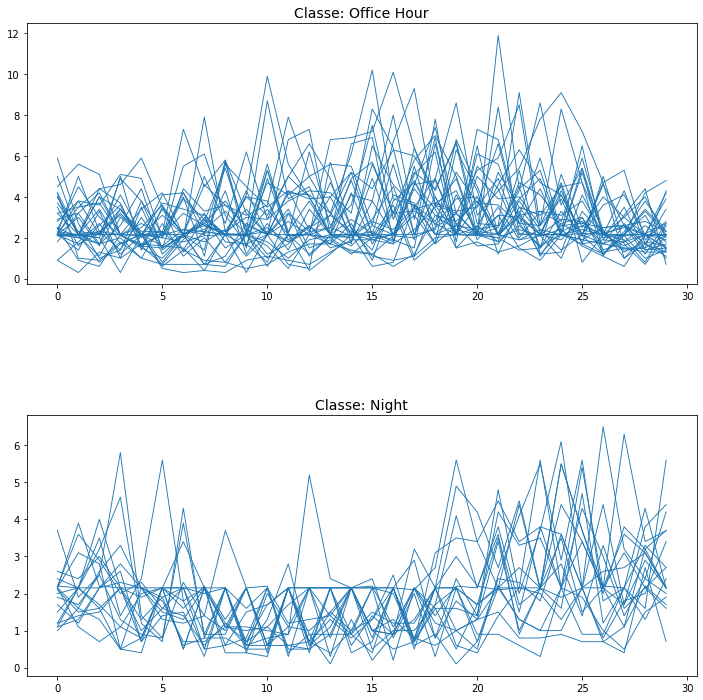

In [ ]:
ts_l= []
ts_arr = []

for i in day0_split:
    ts = i['CO(GT)'].copy()
    ts_l.append(ts)

ts_size = len(day0_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
X_train = np.array(ts_arr)

def divide_day(ts): 
     if ts['DateTime'][ts.index[ts_size//2]].hour <= 19 and ts['DateTime'][ts.index[ts_size//2]].hour >= 7:
        return 'Office Hour'
     else:
        return 'Night'
    
labels = np.array([divide_day(i) for i in day0_split])

y_train = preprocessing.LabelEncoder().fit_transform(labels)

plt.figure(figsize=(12,12))

for i, classe in enumerate(['Office Hour', 'Night']):
    plt.subplot(2, 1, i + 1)
    for x in X_train[labels == classe]:
        plt.plot(x, color='C0',linewidth=0.9)
    plt.title('Classe: {}'.format(classe), fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
ts_l = []
ts_arr = []

for i in day_t1_split:
    ts = i['CO(GT)'].copy()
    ts_l.append(ts)
    ts_size = len(day_t1_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))

X_test1 = np.array(ts_arr)
y_test1 = preprocessing.LabelEncoder().fit_transform(labels)

In [ ]:
ts_l = []
ts_arr = []

for i in day_t2_split:
    ts = i['CO(GT)'].copy()
    ts_l.append(ts)
    ts_size = len(day_t2_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
    
X_test2 = np.array(ts_arr)
y_test2 = preprocessing.LabelEncoder().fit_transform(labels)

In [ ]:
y_test1.shape, X_test1.shape

((52,), (14, 30))

In [ ]:
X_train.shape, y_train.shape


((52, 30), (52,))

In [ ]:
X_test2.shape, y_test2.shape


((14, 30), (52,))

## **Classification Task**

according to our purposes, we want try to determine if a time series represented a office hour or Night. The attribute we will rely on is CO(GT)

The classification task will carry out trogh the analysis of different techqnieus:

Shapelet discovery
Feature based
KNeighborsCalssifiers
DecisionTree
CNN
LSTM (keras)
vediamo se le facciamo tutte, questa è idea base per poter confrontare i risultati

### Shapelet Discovery

In [ ]:
pip install tslearn

In [ ]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 52
ts_sz 30
n_classes 2
shapelet_sizes {3: 3}


In [ ]:
keys = sorted(shapelet_sizes.keys())
# shapelet_sizes[keys]

TypeError: ignored

In [ ]:
# Define the model using parameters provided by the authors (except that we use fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=100,
                        verbose=1)

/usr/local/lib/python3.6/dist-packages/tslearn/shapelets.py:363: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  FutureWarning)


In [ ]:
shp_clf.fit(X_train, y_train)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7997 - binary_accuracy: 0.5962 - binary_crossentropy: 0.7927
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7988 - binary_accuracy: 0.5962 - binary_crossentropy: 0.7918
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7979 - binary_accuracy: 0.5962 - binary_crossentropy: 0.7909
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7970 - binary_accuracy: 0.5962 - binary_crossentropy: 0.7901
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7961 - binary_accuracy: 0.5962 - binary_crossentropy: 0.7892
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7952 - binary_accuracy: 0.5962 - binary_crossentropy: 0.7883
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7943 - binary_accuracy: 0.5962 - binary_crossentropy: 0.7875
Epoch 8/100
1/1 [==============================] - 0s 1ms/step

LearningShapelets(batch_size=256, max_iter=100, max_size=None,
                  n_shapelets_per_size={3: 3}, optimizer='sgd',
                  random_state=None, scale=False, shapelet_length=0.15,
                  total_lengths=3, verbose=1, weight_regularizer=0.01)

In [ ]:
predicted_labels = shp_clf.predict(X_train)
y_pred = shp_clf.predict(X_test2)
print("Correct classification rate:", accuracy_score(y_test2, y_pred))

1/1 [==============================] - 0s 1ms/step


ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.3, random_state=100, stratify=y_train)


ValueError: ignored

In [ ]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 52
ts_sz 30
n_classes 2
shapelet_sizes {3: 3}


In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

/usr/local/lib/python3.6/dist-packages/tslearn/shapelets.py:363: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  FutureWarning)


In [ ]:
shp_clf.fit(X_train, y_train)


Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 1.2703 - binary_accuracy: 0.3846 - binary_crossentropy: 1.2505
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 1.2569 - binary_accuracy: 0.3846 - binary_crossentropy: 1.2373
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 1.2438 - binary_accuracy: 0.3846 - binary_crossentropy: 1.2243
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 1.2308 - binary_accuracy: 0.3846 - binary_crossentropy: 1.2115
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 1.2180 - binary_accuracy: 0.3846 - binary_crossentropy: 1.1988
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 1.2054 - binary_accuracy: 0.3846 - binary_crossentropy: 1.1864
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 1.1930 - binary_accuracy: 0.3846 - binary_crossentropy: 1.1742
Epoch 8/200
1/1 [==============================] - 0s 2ms/step

LearningShapelets(batch_size=256, max_iter=200, max_size=None,
                  n_shapelets_per_size={3: 3}, optimizer='sgd',
                  random_state=None, scale=False, shapelet_length=0.15,
                  total_lengths=3, verbose=1, weight_regularizer=0.01)

In [ ]:
y_pred = shp_clf.predict(X_test)


1/1 [==============================] - 0s 1ms/step


In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6666666666666666
F1-score [0.66666667 0.66666667]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### Shaplet-distances-based Classifier

In [ ]:
X_train2 = shp_clf.transform(X_train)


1/1 [==============================] - 0s 1ms/step


In [ ]:
X_train2.shape


(52, 3)

In [ ]:
X_test2 = shp_clf.transform(X_test)


1/1 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
import scipy.stats as stats


In [ ]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])
X_train3

array([[ 1.88230823,  1.27655508,  1.62959288,  1.97637477,  0.59      ,
         0.75      ,  1.97637477,  2.26318739,  3.42      ,  1.51318739,
         1.47452174,  1.29526642,  2.5258145 ],
       [ 2.54721658,  1.04700549,  1.0962205 ,  2.15274954,  1.4       ,
         1.7       ,  2.15274954,  3.15      ,  4.02      ,  1.45      ,
         2.43285884,  0.76550505, -0.32591733],
       [ 1.54212492,  0.85004264,  0.72257249,  1.4       ,  0.58      ,
         0.9       ,  1.4       ,  2.15274954,  2.32      ,  1.25274954,
         1.81417361,  0.48402695,  0.03582951],
       [ 2.99545826,  1.3301447 ,  1.76928493,  2.45      ,  1.79      ,
         2.15274954,  2.45      ,  3.5       ,  4.73      ,  1.34725046,
         2.25197924,  1.16916111,  0.54898241],
       [ 1.98036661,  1.14253761,  1.30539219,  1.85      ,  0.88      ,
         1.325     ,  1.85      ,  2.18818739,  3.01      ,  0.86318739,
         1.7333054 ,  2.05689143,  6.44266581],
       [ 3.27842498,  1.830229

In [ ]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test2])
X_test3

array([[ 0.99176747,  0.92425901,  0.85425472,  0.58469009,  0.21263504,
         0.35215569,  0.58469009,  1.42784059,  1.93373089,  1.07568491,
         1.07304063,  0.57521713, -1.49999988],
       [ 1.21337736,  1.34493935,  1.80886173,  0.41145071,  0.17884598,
         0.26607276,  0.41145071,  1.75971858,  2.5686793 ,  1.49364582,
         0.90217998,  0.68240172, -1.50000008],
       [ 0.85644835,  0.84945923,  0.72158098,  0.27576447,  0.24398041,
         0.25589943,  0.27576447,  1.1666553 ,  1.7011898 ,  0.91075587,
         1.00822773,  0.7059468 , -1.49999999]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6666666666666666
F1-score [0.66666667 0.66666667]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### Feature-based Classifier


In [ ]:
import scipy.stats as stats


In [ ]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])


In [ ]:
X_train3.shape


(52, 13)

In [ ]:
X_train3

array([[ 1.88230823,  1.27655508,  1.62959288,  1.97637477,  0.59      ,
         0.75      ,  1.97637477,  2.26318739,  3.42      ,  1.51318739,
         1.47452174,  1.29526642,  2.5258145 ],
       [ 2.54721658,  1.04700549,  1.0962205 ,  2.15274954,  1.4       ,
         1.7       ,  2.15274954,  3.15      ,  4.02      ,  1.45      ,
         2.43285884,  0.76550505, -0.32591733],
       [ 1.54212492,  0.85004264,  0.72257249,  1.4       ,  0.58      ,
         0.9       ,  1.4       ,  2.15274954,  2.32      ,  1.25274954,
         1.81417361,  0.48402695,  0.03582951],
       [ 2.99545826,  1.3301447 ,  1.76928493,  2.45      ,  1.79      ,
         2.15274954,  2.45      ,  3.5       ,  4.73      ,  1.34725046,
         2.25197924,  1.16916111,  0.54898241],
       [ 1.98036661,  1.14253761,  1.30539219,  1.85      ,  0.88      ,
         1.325     ,  1.85      ,  2.18818739,  3.01      ,  0.86318739,
         1.7333054 ,  2.05689143,  6.44266581],
       [ 3.27842498,  1.830229

In [ ]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test])


In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6666666666666666
F1-score [0.  0.8]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Time Series Classifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6666666666666666
F1-score [0.  0.8]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install pyts

     |████████████████████████████████| 2.5MB 5.1MB/s 


In [ ]:
from pyts.classification import KNeighborsClassifier


In [ ]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6666666666666666
F1-score [0.66666667 0.66666667]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [ ]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  30
N. LABELS:  2


In [ ]:
cnn = build_simple_cnn(n_timesteps, n_outputs)


In [ ]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 23, 16)            144       
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 16)            64        
_________________________________________________________________
activation (Activation)      (None, 23, 16)            0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 19, 32)            2592      
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 32)            128       
_________________________________________________________________
activation_1 (Activation)    (None, 19, 32)            0

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [ ]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/5
11/11 [==============================] - 0s 10ms/step - loss: 0.4791 - accuracy: 0.8049 - val_loss: 0.4812 - val_accuracy: 0.6364
Epoch 2/5
11/11 [==============================] - 0s 5ms/step - loss: 0.4483 - accuracy: 0.7561 - val_loss: 0.4953 - val_accuracy: 0.6364
Epoch 3/5
11/11 [==============================] - 0s 5ms/step - loss: 0.4960 - accuracy: 0.7561 - val_loss: 0.5219 - val_accuracy: 0.6364
Epoch 4/5
11/11 [==============================] - 0s 5ms/step - loss: 0.3485 - accuracy: 0.8537 - val_loss: 0.5481 - val_accuracy: 0.6364
Epoch 5/5
11/11 [==============================] - 0s 5ms/step - loss: 0.4273 - accuracy: 0.8537 - val_loss: 0.5587 - val_accuracy: 0.6364


In [ ]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6666666666666666
F1-score [0.  0.8]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn.evaluate(X_test_cnn, y_test)


1/1 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.6667


[0.5520922541618347, 0.6666666865348816]

###  LSTM Classifier

In [ ]:
from keras.layers import LSTM


In [ ]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(256, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
lstm = build_lstm(n_timesteps, n_outputs)


In [ ]:
lstm.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 280,770
Trainable params: 280,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/10
11/11 [==============================] - 0s 6ms/step - loss: 0.5468 - accuracy: 0.7073 - val_loss: 0.5627 - val_accuracy: 0.6364
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.8293 - val_loss: 0.5659 - val_accuracy: 0.6364
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5001 - accuracy: 0.7561 - val_loss: 0.5762 - val_accuracy: 0.6364
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3708 - accuracy: 0.8780 - val_loss: 0.5859 - val_accuracy: 0.6364
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.7561 - val_loss: 0.5823 - val_accuracy: 0.6364
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8293 - val_loss: 0.5828 - val_accuracy: 0.7273
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.7805 - val_loss: 0.5889 - val_accuracy: 0.7273
Epoch 8/10
11/11 [==

In [ ]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6666666666666666
F1-score [0.  0.8]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lstm.evaluate(X_test_cnn, y_test)


1/1 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6667


[0.6745977401733398, 0.6666666865348816]